# Lab Instructions

Choose your own adventure! In this lab, you will select a dataset, identify the target feature, and determine what relationships are present between the target and the other features in the data.

The dataset should have at least 5 features plus the target and at least a few hundred rows.  If the original dataset has more than 5 features, you may select the 5 that seem most interesting for this project. The subject can be anything you choose.  

For your lab submission, describe the dataset and the features - including all of the values of the features - and identify the target feature.  Then make visualizations to show the relationship of each feature to the target.  Which feature(s) seem most related?  Which features don't seem to influence the value of the target?  Draw at least one big picture conclusion about your data from the visualizations you've created.


**Topic:** Worldwide Travel Destinations
https://www.kaggle.com/datasets/leondesilva1/travel-destinations

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
warnings.filterwarnings("ignore")
sns.set(style="whitegrid")

df = pd.read_csv("Worldwide Travel Cities Dataset (Ratings and Climate).csv")


df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-null    object 
 9   budget_level       560 non-null    object 
 10  culture            560 non-null    int64  
 11  adventure          560 non-null    int64  
 12  nature             560 non-null    int64  
 13  beaches            560 non-null    int64  
 14  nightlife          560 non-null    int64  
 15  cuisine            560 non-null    int64  
 16  wellness           560 non

,id,city,country,region,short_description,latitude,longitude,avg_temp_monthly,ideal_durations,budget_level,culture,adventure,nature,beaches,nightlife,cuisine,wellness,urban,seclusion
0,c54acf38-3029-496b-8c7a-8343ad82785c,Milan,Italy,europe,"Chic streets lined with fashion boutiques, his...",45.464194,9.189635,"{""1"":{""avg"":3.7,""max"":7.8,""min"":0.4},""2"":{""avg...","[""Short trip"",""One week""]",Luxury,5,2,2,1,4,5,3,5,2
1,0bd12654-ed64-424e-a044-7bc574bcf078,Yasawa Islands,Fiji,oceania,"Crystal-clear waters, secluded beaches, and vi...",-17.290947,177.125786,"{""1"":{""avg"":28,""max"":30.8,""min"":25.8},""2"":{""av...","[""Long trip"",""One week""]",Luxury,2,4,5,5,2,3,4,1,5
2,73036cda-9134-46fc-a2c6-807782d59dfb,Whistler,Canada,north_america,Snow-capped peaks and lush forests create a se...,50.117190,-122.954302,"{""1"":{""avg"":-2.5,""max"":0.4,""min"":-5.5},""2"":{""a...","[""Short trip"",""Weekend"",""One week""]",Luxury,3,5,5,2,3,3,4,2,4
3,3872c9c0-6b6e-49e1-9743-f46bfe591b86,Guanajuato,Mexico,north_america,Winding cobblestone streets and colorful facad...,20.987700,-101.000000,"{""1"":{""avg"":15.5,""max"":22.8,""min"":8.7},""2"":{""a...","[""Weekend"",""One week"",""Short trip""]",Mid-range,5,3,3,1,3,4,3,4,2
4,e1ebc1b6-8798-422d-847a-22016faff3fd,Surabaya,Indonesia,asia,Bustling streets filled with the aroma of loca...,-7.245972,112.737827,"{""1"":{""avg"":28.1,""max"":32.5,""min"":25.5},""2"":{""...","[""Short trip"",""Weekend""]",Budget,4,3,3,2,3,4,3,4,2


### Dataset Introduction  

This dataset contains information about **560 travel destinations worldwide**, including their locations, climate, budget range, and multiple category ratings such as **culture**, **adventure**, **nature**, **beaches**, **nightlife**, **cuisine**, **wellness**, **urban**, and **seclusion**.  

These features provide insight into what makes each destination appealing to travelers, allowing us to analyze which characteristics contribute most to overall popularity.


In [6]:
df.info()

# Creating the target variable/average of the 9 category scores
rating_columns = ['culture', 'adventure', 'nature', 'beaches', 'nightlife', 'cuisine', 'wellness', 'urban', 'seclusion']
df['Popularity Score'] = df[rating_columns].mean(axis=1)

# Preview the new column, popularity score
df[['city', 'country', 'Popularity Score']].head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 560 entries, 0 to 559
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 560 non-null    object 
 1   city               560 non-null    object 
 2   country            560 non-null    object 
 3   region             560 non-null    object 
 4   short_description  560 non-null    object 
 5   latitude           560 non-null    float64
 6   longitude          560 non-null    float64
 7   avg_temp_monthly   560 non-null    object 
 8   ideal_durations    560 non-null    object 
 9   budget_level       560 non-null    object 
 10  culture            560 non-null    int64  
 11  adventure          560 non-null    int64  
 12  nature             560 non-null    int64  
 13  beaches            560 non-null    int64  
 14  nightlife          560 non-null    int64  
 15  cuisine            560 non-null    int64  
 16  wellness           560 non

,city,country,Popularity Score
0,Milan,Italy,3.222222
1,Yasawa Islands,Fiji,3.444444
2,Whistler,Canada,3.444444
3,Guanajuato,Mexico,3.111111
4,Surabaya,Indonesia,3.111111


### Dataset Overview  

The dataset includes 19 features describing 560 unique destinations.  
Each city entry contains location data, climate information, budget level, and nine ratings (1–5 scale) that describe different travel experiences such as **Culture**, **Adventure**, and **Nightlife**.

There were no missing values in the dataset, which means it is ready for analysis.  

Because the dataset didn’t include an overall popularity metric, I added a new column called **“Popularity Score”** which was created by averaging the nine rating categories.  
This new variable will serve as our **target feature** and represent each city’s overall traveler appeal.


In [7]:
df.iloc[0]


id                                c54acf38-3029-496b-8c7a-8343ad82785c
city                                                             Milan
country                                                          Italy
region                                                          europe
short_description    Chic streets lined with fashion boutiques, his...
latitude                                                     45.464194
longitude                                                     9.189635
avg_temp_monthly     {"1":{"avg":3.7,"max":7.8,"min":0.4},"2":{"avg...
ideal_durations                              ["Short trip","One week"]
budget_level                                                    Luxury
culture                                                              5
adventure                                                            2
nature                                                               2
beaches                                                              1
nightl

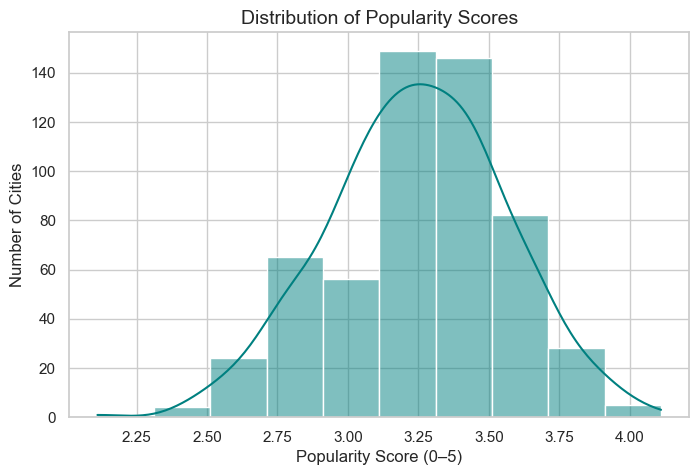

In [8]:
plt.figure(figsize=(8,5))
sns.histplot(df['Popularity Score'], kde=True, color='teal', bins=10)
plt.title("Distribution of Popularity Scores", fontsize=14)
plt.xlabel("Popularity Score (0–5)")
plt.ylabel("Number of Cities")
plt.show()


Most destinations have scores between **3.0 and 4.0**, suggesting that many cities offer a balanced mix of attractions, culture, and amenities.  
Only a small number of locations fall below 2.5 or above 4.5, indicating that extreme ratings are rare and most destinations are moderately to highly appealing to travelers.

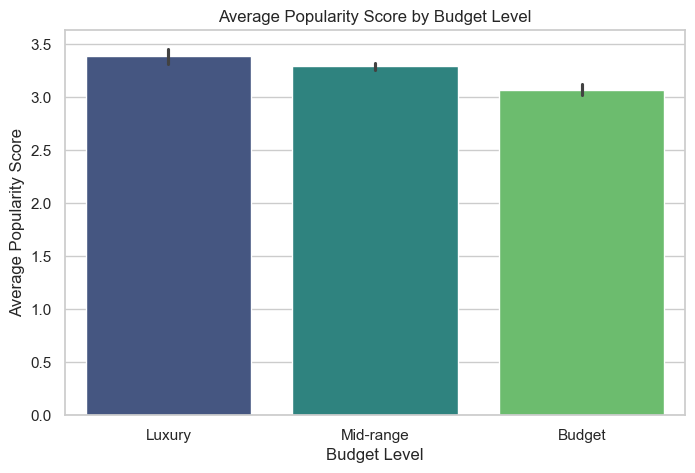

In [11]:
plt.figure(figsize=(8,5))
sns.barplot(x='budget_level', y='Popularity Score', data=df, palette='viridis')
plt.title("Average Popularity Score by Budget Level")
plt.xlabel("Budget Level")
plt.ylabel("Average Popularity Score")
plt.show()


### Popularity vs. Budget Level  

This chart shows the average **Popularity Score** for destinations based on their **budget level**.  

Luxury destinations tend to have slightly higher popularity scores on average,  
suggesting that cities known for upscale experiences and amenities may be more attractive to travelers.  
Mid-range destinations remain competitive, indicating that affordability does not necessarily reduce appeal.


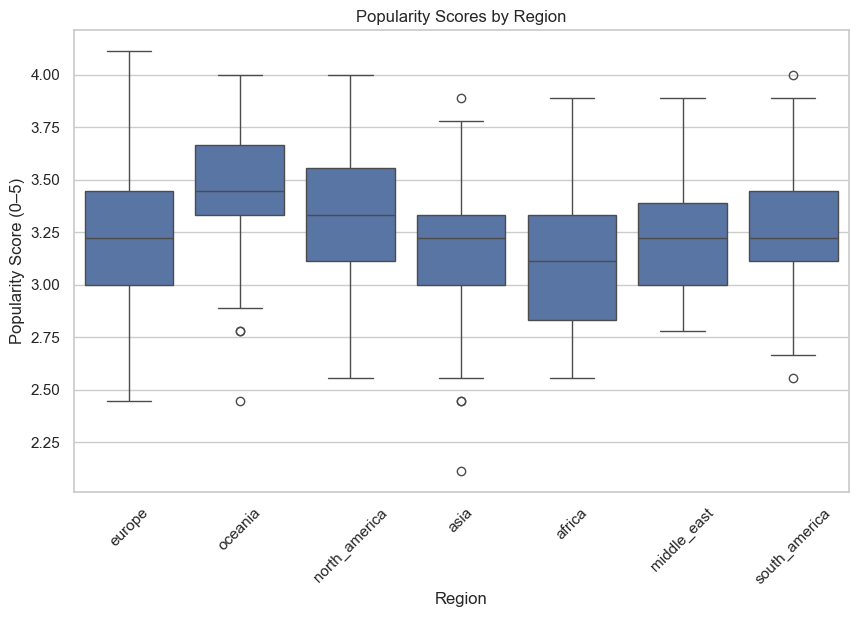

In [12]:
plt.figure(figsize=(10,6))
sns.boxplot(x='region', y='Popularity Score', data=df)
plt.title("Popularity Scores by Region")
plt.xlabel("Region")
plt.ylabel("Popularity Score (0–5)")
plt.xticks(rotation=45)
plt.show()


### Popularity by Region  

The boxplot compares **Popularity Scores** across regions.  
Regions like **Europe** and **North America** show higher median popularity,  
while regions with more remote or less urban destinations have wider spreads in scores.  

This suggests that cultural and economic development may influence perceived attractiveness among travelers.


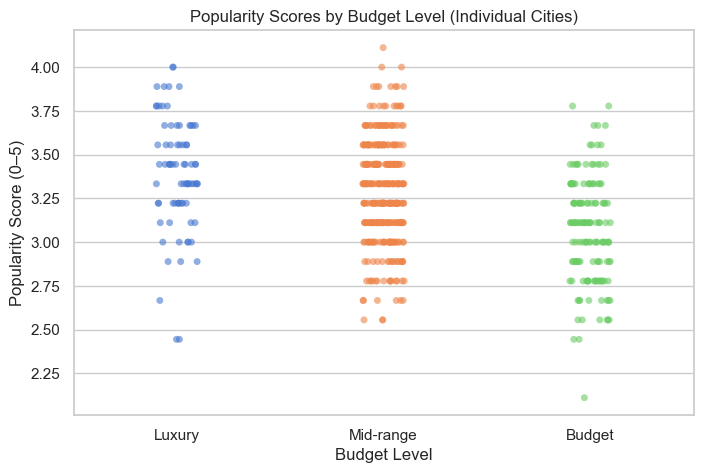

In [18]:
plt.figure(figsize=(8,5))
sns.stripplot(x='budget_level', y='Popularity Score', data=df, jitter=True, alpha=0.6, palette='muted')
plt.title("Popularity Scores by Budget Level (Individual Cities)")
plt.xlabel("Budget Level")
plt.ylabel("Popularity Score (0–5)")
plt.show()


### Popularity Scores by Budget Level (Individual Cities)  

Each dot represents an individual city’s **Popularity Score** grouped by **budget level**.  
Luxury destinations tend to cluster toward higher popularity,  
while mid-range and budget cities show wider variation in traveler appeal.  
This suggests that luxury and mid-range destinations are not only more popular but also more consistently rated highly.


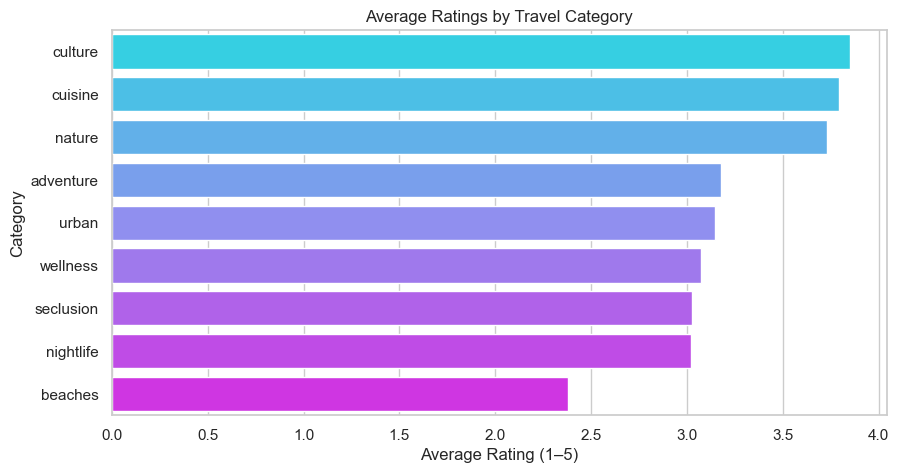

In [14]:
avg_ratings = df[rating_columns].mean().sort_values(ascending=False)

plt.figure(figsize=(10,5))
sns.barplot(x=avg_ratings.values, y=avg_ratings.index, palette='cool')
plt.title("Average Ratings by Travel Category")
plt.xlabel("Average Rating (1–5)")
plt.ylabel("Category")
plt.show()


### Average Ratings by Category  

On average, **Culture**, **Cuisine**, and **nature** are the highest-rated categories across all destinations.  
Features like **Beaches** and **nightlife** have lower averages,  
showing that travelers value vibrant, social, and culturally rich experiences more than remote getaways.


### Conclusion  

Based on the data analysis, **budget level** and **region** are the strongest factors influencing city popularity.  
Luxury destinations especially in **Europe** and **North America** consistently achieve higher popularity scores, while budget and mid-range destinations show more variation.  
This suggests that travelers value comfort, accessibility, and luxury when choosing destinations.  
Features like **latitude**, **seclusion**, or **beaches** appear to have little direct influence on overall popularity.  
The data indicates that tourism companies should focus marketing and investment strategies on upscale, culturally rich regions to attract the widest traveler interest.  

